Playing First Derivative Signal:


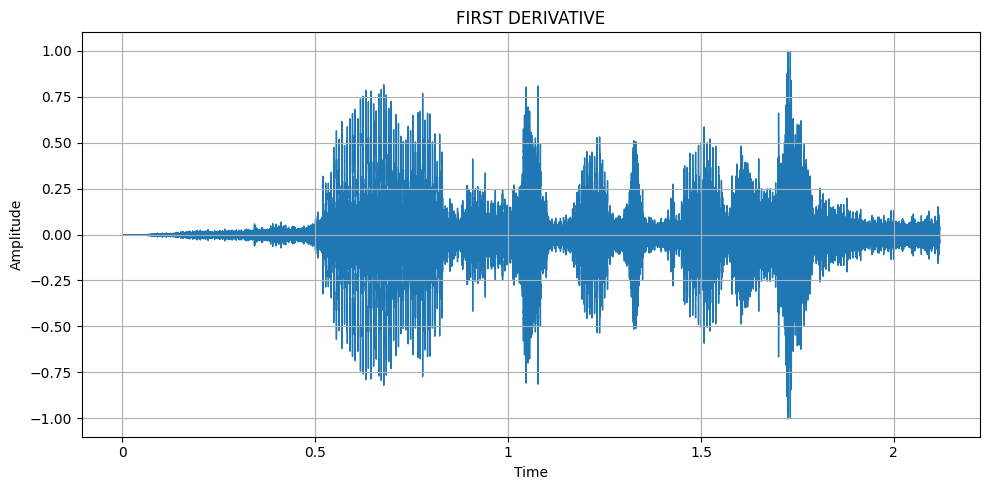

In [1]:

import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd

y, sr = librosa.load('/content/drive/MyDrive/Lab 2/Audio file.wav')
derivative_1 = np.diff(y)
derivative_1 /= np.max(np.abs(derivative_1))

print("Playing First Derivative Signal:")

plt.figure(figsize=(10, 5))
librosa.display.waveshow(derivative_1, sr=sr)
plt.title('FIRST DERIVATIVE')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()

ipd.Audio(derivative_1, rate=sr)

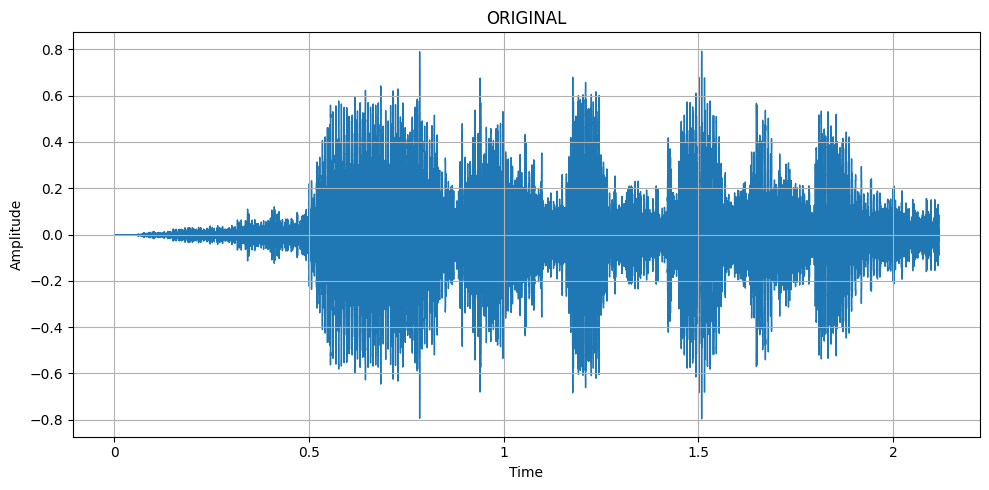

In [2]:
plt.figure(figsize=(10, 5))
librosa.display.waveshow(y, sr=sr)
plt.title('ORIGINAL')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()

ipd.Audio(y, rate=sr)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
<ipython-input-3-86c64c2e6f06>:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(np.arange(len(speech_regions)), speech_regions, 'ro', label='Speech regions',color = 'green')
<ipython-input-3-86c64c2e6f06>:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(np.arange(len(speech_regions), len(speech_regions) + len(silence_regions)), silence_regions, 'bo', label='Silence regions',color = 'green')


Average length between consecutive zero crossings in speech regions: nan
Average length between consecutive zero crossings in silence regions: 3.8407632834347756


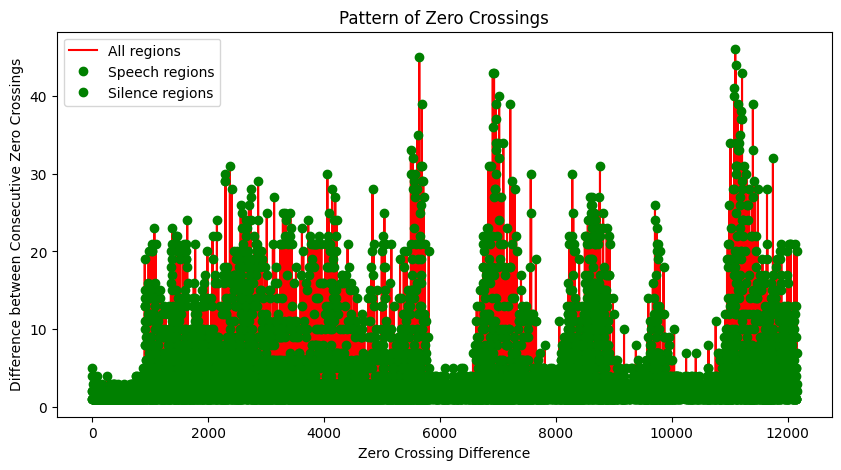

Pattern of Zero Crossings:
All regions: [ 4  1  2 ... 20  7  3]
Speech regions: []
Silence regions: [ 4  1  2 ... 20  7  3]


In [3]:
zero_crossing = np.where(np.diff(np.sign(derivative_1)))[0]
diff = np.diff(zero_crossing)
threshold = 1000
speech_regions = diff[diff > threshold]
silence_regions = diff[diff <= threshold]

avg_length_speech = np.mean(speech_regions)
avg_length_silence = np.mean(silence_regions)

print("Average length between consecutive zero crossings in speech regions:", avg_length_speech)
print("Average length between consecutive zero crossings in silence regions:", avg_length_silence)

plt.figure(figsize=(10, 5))
plt.plot(diff, label='All regions',color = 'red')
plt.plot(np.arange(len(speech_regions)), speech_regions, 'ro', label='Speech regions',color = 'green')
plt.plot(np.arange(len(speech_regions), len(speech_regions) + len(silence_regions)), silence_regions, 'bo', label='Silence regions',color = 'green')
plt.title('Pattern of Zero Crossings')
plt.xlabel('Zero Crossing Difference')
plt.ylabel('Difference between Consecutive Zero Crossings')
plt.legend()
plt.show()

print("Pattern of Zero Crossings:")
print("All regions:", diff)
print("Speech regions:", speech_regions)
print("Silence regions:", silence_regions)

Lengths of the spoken words MINE: [0.9178333333333333, 1.3378333333333334, 1.3578333333333332, 1.1778333333333333, 1.5778333333333334]
Lengths of the spoken words TeamMate: [2.944, 3.3706666666666667, 3.136, 2.368, 2.944]


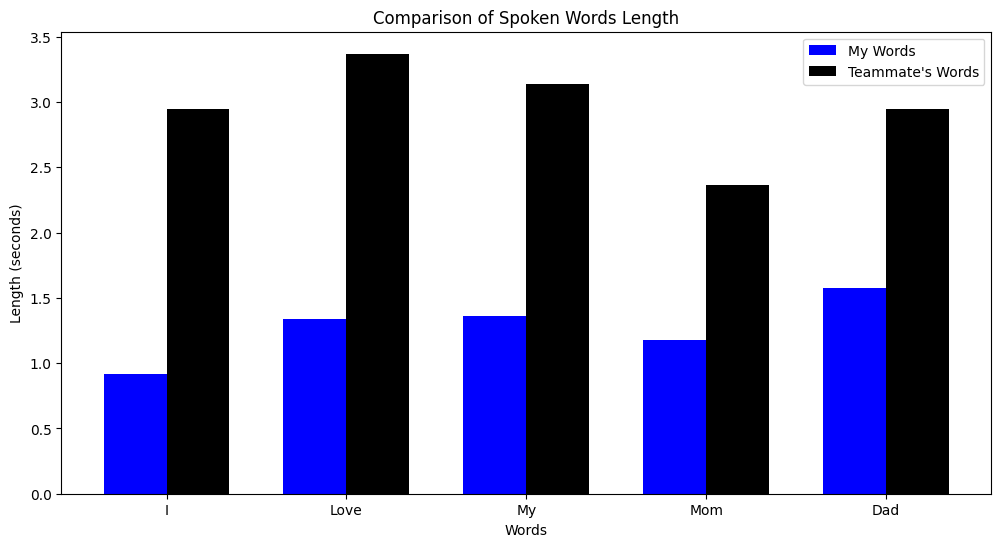

In [8]:
word_files_mine = ['/content/drive/MyDrive/Lab 2/i.wav', '/content/drive/MyDrive/Lab 2/love.wav', '/content/drive/MyDrive/Lab 2/my.wav', '/content/drive/MyDrive/Lab 2/mom.wav', '/content/drive/MyDrive/Lab 2/dad.wav']
word_files_team_mate = ['/content/drive/MyDrive/Lab 2/other_i.wav', '/content/drive/MyDrive/Lab 2/other_love.wav', '/content/drive/MyDrive/Lab 2/other_my.wav', '/content/drive/MyDrive/Lab 2/other_mom.wav', '/content/drive/MyDrive/Lab 2/other_dad.wav']
words = ['I', 'Love', 'My', 'Mom', 'Dad']
word_lengths_mine = []
word_lengths_teammate = []

for word_file in word_files_mine:
    signal, sr = librosa.load(word_file, sr=None)
    length_seconds = len(signal) / sr
    word_lengths_mine.append(length_seconds)

for word_file in word_files_team_mate:
    signal, sr = librosa.load(word_file, sr=None)
    length_seconds = len(signal) / sr
    word_lengths_teammate.append(length_seconds)

print("Lengths of the spoken words MINE:", word_lengths_mine)
print("Lengths of the spoken words TeamMate:", word_lengths_teammate)

bar_width = 0.35
index = np.arange(len(words))
plt.figure(figsize=(12, 6))
plt.bar(index - bar_width/2, word_lengths_mine, bar_width, label='My Words', color='blue')
plt.bar(index + bar_width/2, word_lengths_teammate, bar_width, label="Teammate's Words", color='black')
plt.xlabel('Words')
plt.ylabel('Length (seconds)')
plt.title('Comparison of Spoken Words Length')
plt.xticks(index, words)
plt.legend()

plt.show()


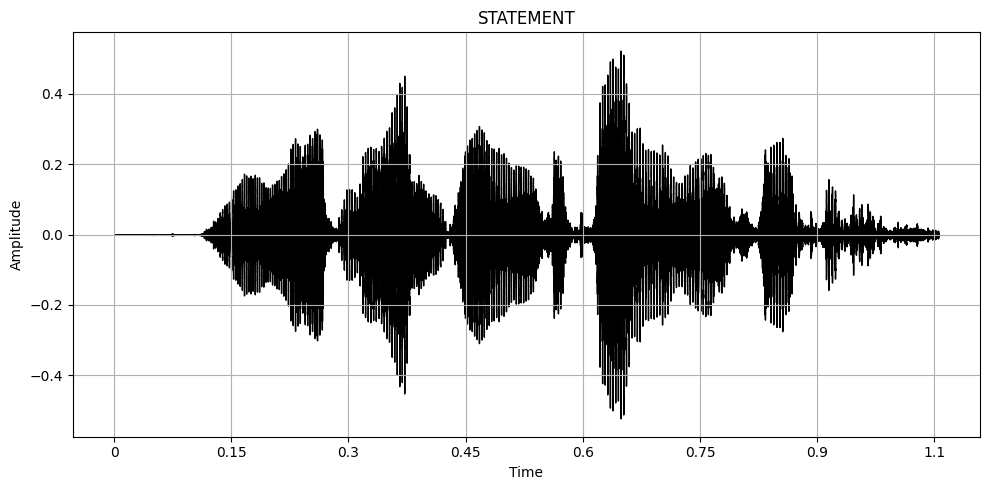

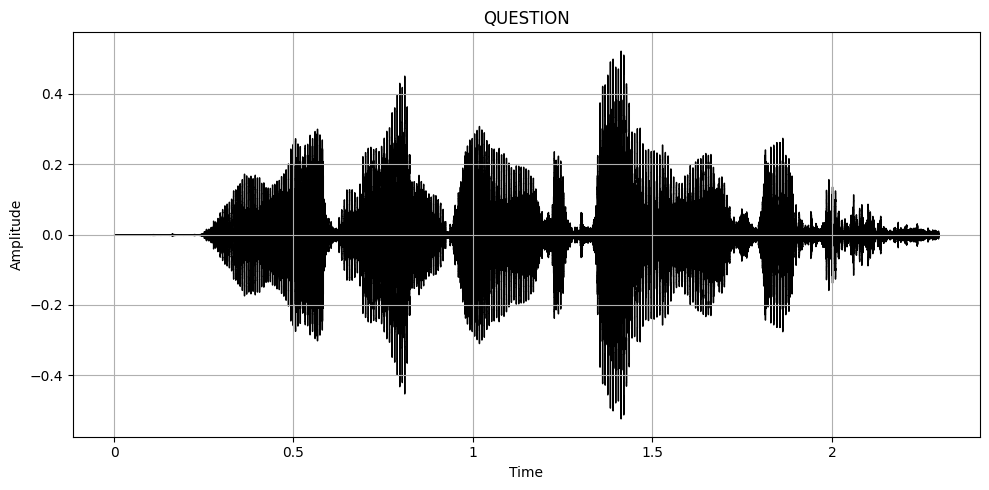

In [9]:

statement, sr1 = librosa.load('/content/drive/MyDrive/Lab 2/statement.wav')
question, sr2 = librosa.load('/content/drive/MyDrive/Lab 2/question.wav')
plt.figure(figsize=(10, 5))
librosa.display.waveshow(statement, sr=sr,color='black')
plt.title('STATEMENT')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()

question, sr = librosa.load('/content/drive/MyDrive/Lab 2/question.wav')
plt.figure(figsize=(10, 5))
librosa.display.waveshow(statement, sr=sr,color='black')
plt.title('QUESTION')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()